In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Centroid:
    def __init__(self, distance='euclidean'):
        self.distance = distance

    def fit(self, X_train, y_train):
        self.centroids = np.zeros((len(np.unique(y_train)), X_train.shape[1]))
        # Calcula os centroides para cada classe existente
        for i in np.unique(y_train):
            self.centroids[i] = X_train[y_train == i].mean(axis=0)

    def euclidean_distance(self, x1, x2):
        distance = 0.0
        for a, b in zip(x1, x2):
            distance += (a - b) ** 2
        return distance ** 0.5

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i, x in enumerate(X_test):
            if self.distance == 'euclidean':
                distances = [self.euclidean_distance(x, centroid) for centroid in self.centroids]
                y_pred[i] = np.argmin(distances)
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

    def fit_predict_score(self, X_train, y_train, X_test, y_test):
        self.fit(X_train, y_train)
        return self.score(X_train, y_train), self.score(X_test, y_test)

    def normalize(self, X):
        return (X - X.mean(axis=0)) / X.std(axis=0)

    def run(self, X, y, test_size=0.3):
        # Dividindo o treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        X_train = self.normalize(X_train)
        X_test = self.normalize(X_test)
        return self.fit_predict_score(X_train, y_train, X_test, y_test)

# Utilizei a iris do sklearn
iris = datasets.load_iris()
X, y = iris.data, iris.target

centroid = Centroid()
train_score, test_score = centroid.run(X, y)
print(f'Train score: {train_score:.2f}')
print(f'Test score: {test_score:.2f}')


Train score: 0.88
Test score: 0.91


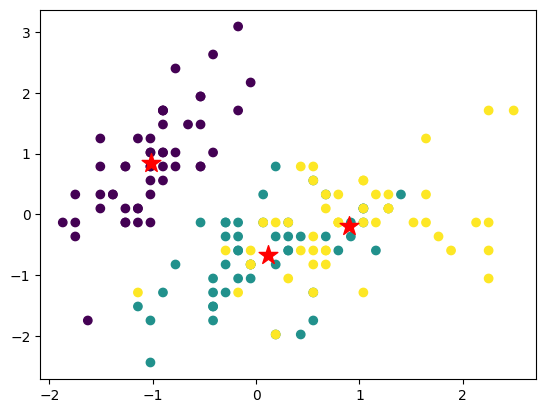

In [ ]:
import matplotlib.pyplot as plt
X = centroid.normalize(X)
centroid.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centroid.centroids[:, 0], centroid.centroids[:, 1], marker="*", c='red', s=200)
plt.show()